<a href="https://colab.research.google.com/github/sdjk14/urdu-characters-/blob/master/Copy_of_model22_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install --upgrade tensorflow
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import os
import glob
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
!pip install git+https://github.com/jfilter/split-folders
import splitfolders

  Cloning https://github.com/jfilter/split-folders to /tmp/pip-req-build-1fdz2jzo
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders /tmp/pip-req-build-1fdz2jzo
  Resolved https://github.com/jfilter/split-folders to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [14]:
'''os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
splitfolders.ratio('super/',output='output',seed=121,ratio=(0.8, 0.2))'''

"os.makedirs('output')\nos.makedirs('output/train')\nos.makedirs('output/val')\nsplitfolders.ratio('super/',output='output',seed=121,ratio=(0.8, 0.2))"

In [15]:
image_width = 32
image_height = 32
train_path = 'output/train/'
test_path = 'output/val/'
epochs = 20
batch_size = 32
num_of_train_samples = 8000
num_of_test_samples = 2000

In [16]:
# Print the shape of a batch of data from the data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Extract the zip file
zip_path = 'Sindhi dataset.zip'  # Replace with the actual zip file name
extract_dir = 'sindhi'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

# Step 2: Verify the extracted files
for root, dirs, files in os.walk(extract_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print('----------------------------------------')

# Adjust paths based on the actual directory structure
train_path = os.path.join(extract_dir, 'Sindhi dataset', 'Sindhiwords')  # Adjust this to your specific folder structure
test_path = train_path  # Assuming test data is in the same directory for this example

if not os.path.isdir(train_path):
    raise FileNotFoundError(f"Directory does not exist: {train_path}")

# Step 3: Define the parameters
image_width, image_height = 150, 150
batch_size = 32
epochs = 20
num_of_train_samples = 8000
num_of_test_samples = 2000

# Step 4: Define the data generators
datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2  # Use 20% of data for validation
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    subset='training'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    subset='validation'
)

# Step 5: Define and compile the model
model = Sequential([
    Input(shape=(150, 150, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # Adjusted to match the number of classes in your dataset
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Step 6: Train the model
early_stopping = EarlyStopping(patience=5)

model.fit(train_generator,
          steps_per_epoch=num_of_train_samples // batch_size,
          epochs=epochs,
          validation_data=test_generator,
          validation_steps=num_of_test_samples // batch_size,
          callbacks=[early_stopping]
         )


Files extracted to sindhi
Root: sindhi
Directories: ['Sindhi dataset']
Files: []
----------------------------------------
Root: sindhi/Sindhi dataset
Directories: ['Sindhiwords', 'sindhi', 'Sindhi']
Files: []
----------------------------------------
Root: sindhi/Sindhi dataset/Sindhiwords
Directories: ['1', 'train', '3', '4', '5', '2']
Files: []
----------------------------------------
Root: sindhi/Sindhi dataset/Sindhiwords/1
Directories: []
Files: ['133(207).png', '133(393).png', '133(255).png', '133(368).png', '133(433).png', '133(178).png', '133(254).png', '133(439).png', '133(335).png', '133(184).png', '133(376).png', '133(334).png', '133(261).png', '133(305).png', '133(258).png', '133(208).png', '133(371).png', '133(325).png', '133(288).png', '133(307).png', '133(185).png', '133(310).png', '133(395).png', '133(287).png', '133(336).png', '133(365).png', '133(306).png', '133(253).png', '133(215).png', '133(180).png', '133(216).png', '133(283).png', '133(390).png', '133(338).png', '

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,660,054 (10.15 MB)

 Trainable params: 2,660,054 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  7/250 ━━━━━━━━━━━━━━━━━━━━ 2:17 566ms/step - categorical_accuracy: 0.1356 - loss: 2.4522

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - categorical_accuracy: 0.2662 - loss: 2.2284 - val_categorical_accuracy: 0.2000 - val_loss: 1.6073
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - categorical_accuracy: 0.3669 - loss: 1.5159 - val_categorical_accuracy: 0.5400 - val_loss: 1.2933
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - categorical_accuracy: 0.6284 - loss: 1.0877 - val_categorical_accuracy: 0.6600 - val_loss: 0.9250
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - categorical_accuracy: 0.7298 - loss: 0.7469 - val_categorical_accuracy: 0.7400 - val_loss: 0.7065
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - categorical_accuracy: 0.7253 - loss: 0.6016 - val_categorical_accuracy: 0.7200 - val_loss: 0.6852
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - categorical_accuracy: 0.7747 - loss: 0.4898 - val_categorical_accuracy: 0.7600 - val_loss: 0.6993
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - categorical_accuracy: 0.8359 - loss: 

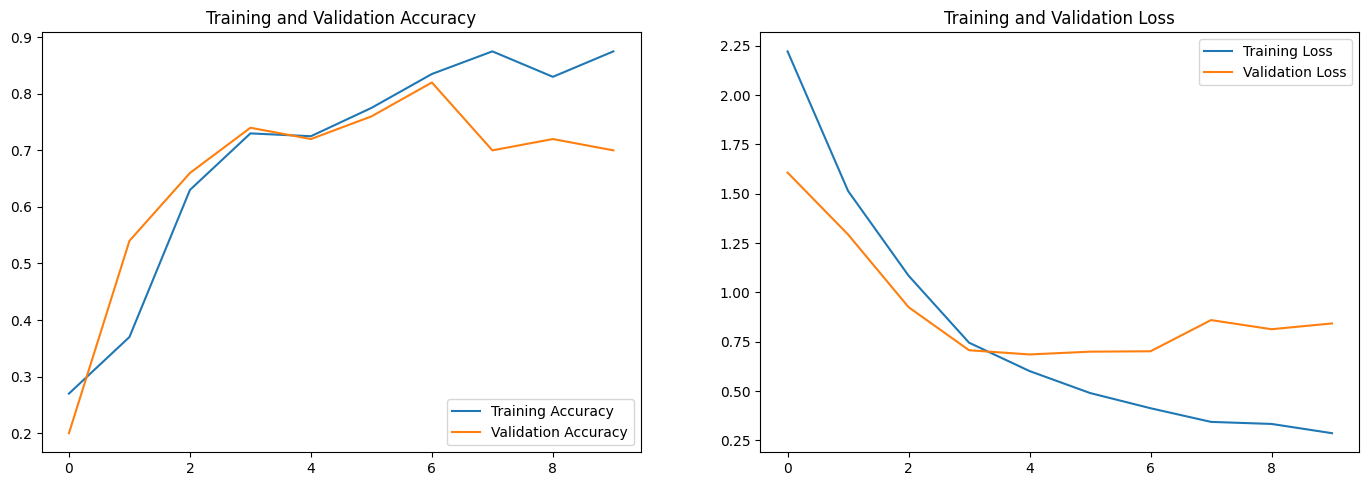

In [36]:
import matplotlib.pyplot as plt
acc = model.history.history['categorical_accuracy']
val_acc = model.history.history['val_categorical_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
test_generator1 = ImageDataGenerator()
test_data_generator = test_generator1.flow_from_directory(
    test_path, # Put your path here
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False)
import math

test_steps_per_epoch = math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 250 images belonging to 6 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


In [38]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [39]:
import numpy as np

# Assuming `true_classes` contains your true class labels
unique_classes = np.unique(true_classes)

# Creating class labels
class_labels = [f"Class_{i}" for i in unique_classes]

# Now you can use `class_labels` in the `classification_report` function
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

     Class_0       0.88      1.00      0.93        50
     Class_1       0.65      0.96      0.77        50
     Class_2       0.54      0.62      0.58        50
     Class_3       1.00      0.92      0.96        50
     Class_4       1.00      0.32      0.48        50

    accuracy                           0.76       250
   macro avg       0.81      0.76      0.75       250
weighted avg       0.81      0.76      0.75       250



In [40]:
cf_matrix=confusion_matrix(true_classes,predicted_classes)
print(cf_matrix)

[[50  0  0  0  0]
 [ 0 48  2  0  0]
 [ 2 17 31  0  0]
 [ 3  1  0 46  0]
 [ 2  8 24  0 16]]


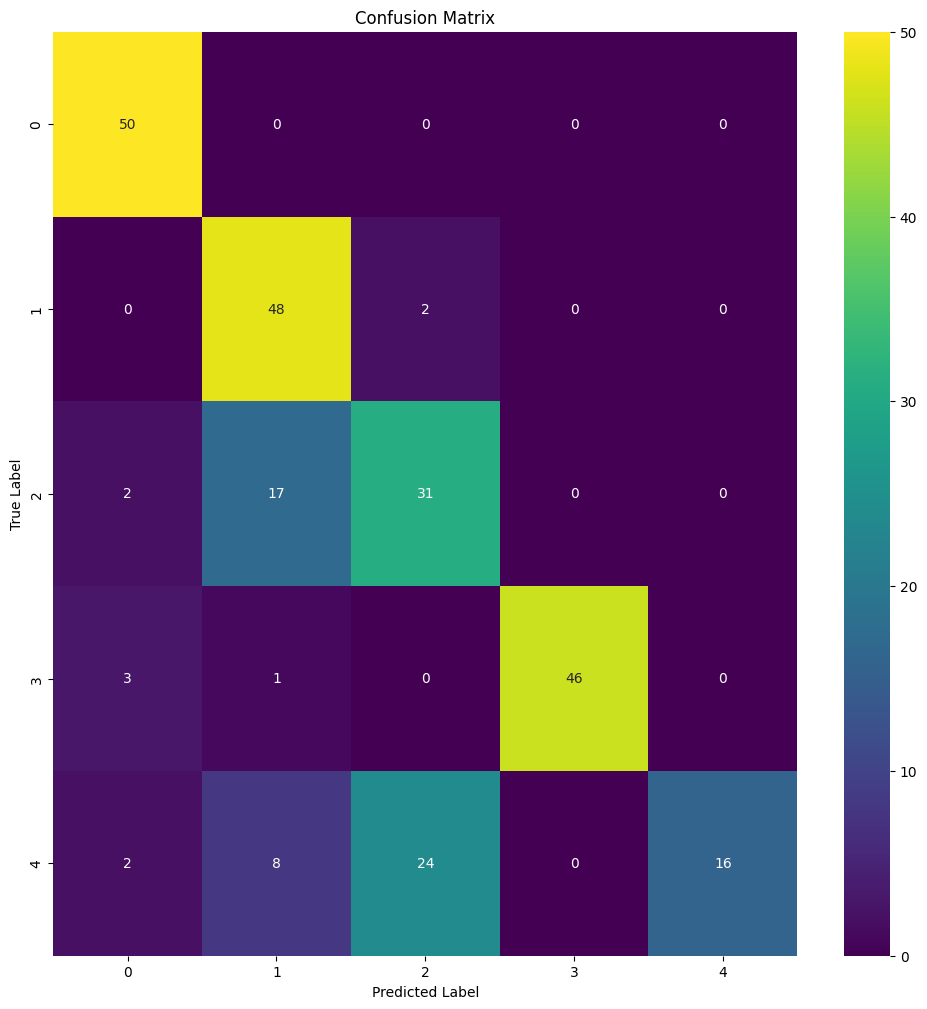

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [43]:
from sklearn.metrics import classification_report

# Assuming test_labels and predicted_labels are defined with appropriate values
# test_labels = ...
# predicted_labels = ...

# Generate the classification report
report_dict = classification_report(true_classes, predicted_classes, labels=list(range(0,47)),
                                   target_names=class_labels, output_dict=True, zero_division=0)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 47, does not match size of target_names, 5
  warnings.warn(


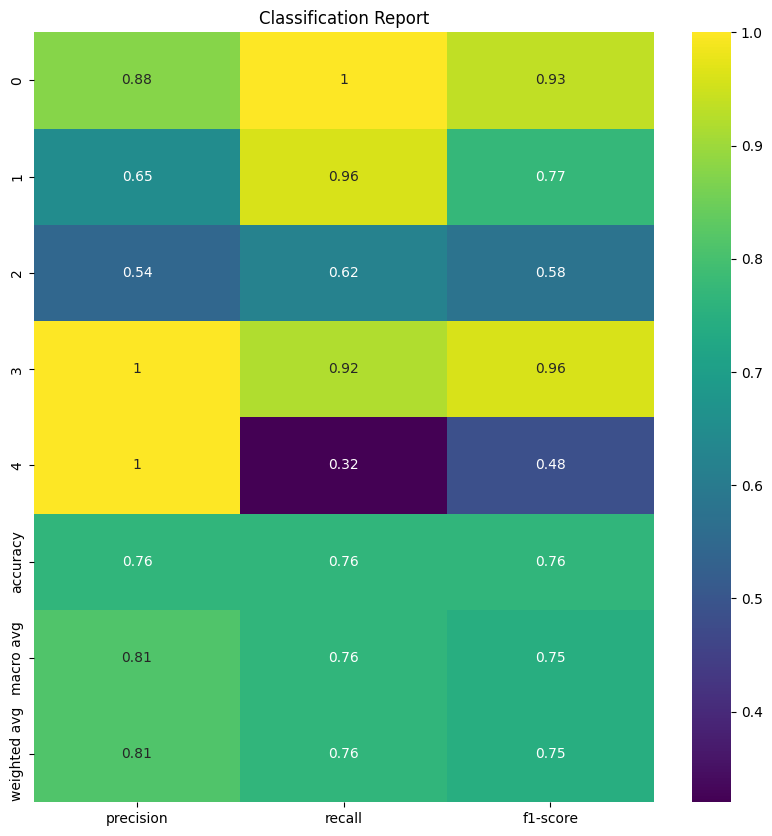

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you already have true labels and predicted labels
true_labels = test_data_generator.classes
predicted_classes = np.argmax(predictions, axis=1)

# Generate classification report
clf_report = classification_report(true_labels, predicted_classes, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(clf_report).iloc[:-1, :].T

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(report_df, annot=True, cmap='viridis')
plt.title('Classification Report')
plt.savefig('classification_report.jpeg')
plt.savefig('classification_report.png')
plt.show()


In [45]:
# Save the model in the native Keras format
model.save('my_model.keras')


In [46]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.keras')

# Recompile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can use the model for prediction or further training



In [47]:

import tensorflow as tf
from tensorflow import keras
import numpy as np

try:
    path = r'E:\Dataset\Sindhi\train\18\{}.jpeg'.format(1)  # Adjust the format accordingly
    for i in range(len(prediction)):
        print(prediction[0] + 1)  # Adjust this line accordingly
        image = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale')
        input_arr = keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])
        prediction = np.argmax(mymodel.predict(input_arr), axis=-1)
except:
    pass



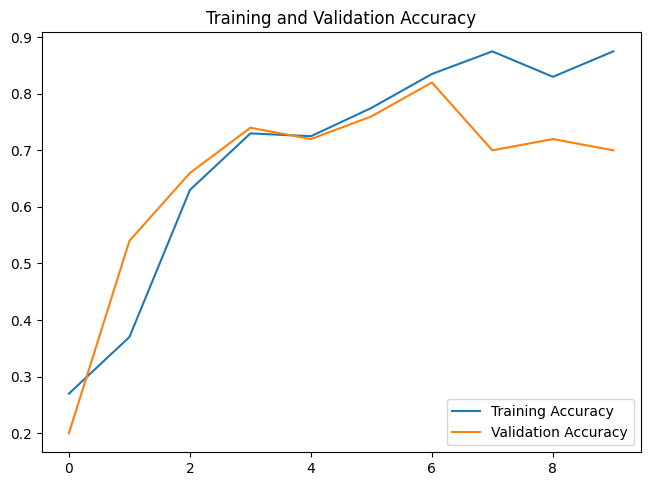

In [48]:

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('Training and Validation Accuracy.jpeg')
plt.savefig('Training and Validation Accuracy.jpeg')

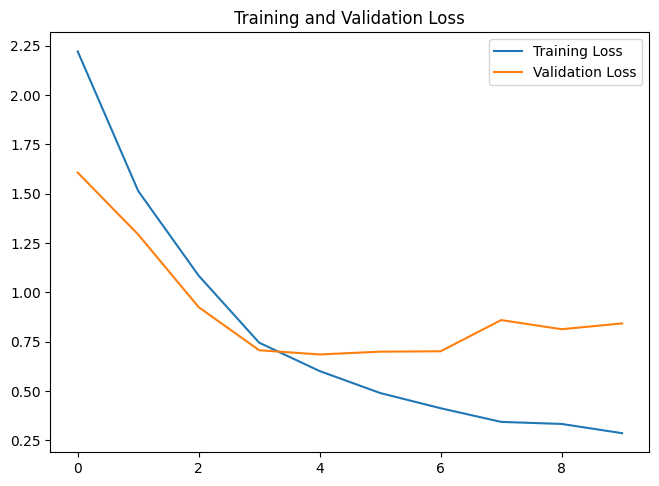

In [49]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Training and Validation Loss')
plt.savefig('Training and Validation Loss.jpeg')

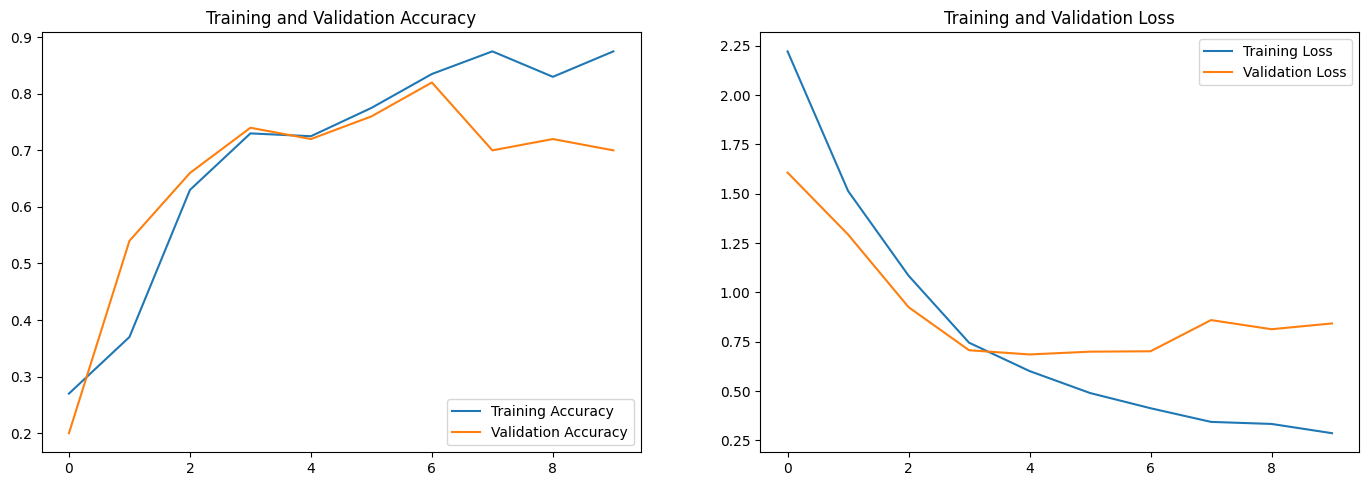

In [50]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('loss and accuracy.png')
plt.savefig('loss and accuracy.jpeg')